In [2]:
from src.Roulette import Roulette
from src.Bet import Bet
from src.GameState import GameState, RoundResult
from typing import Callable, Optional, List
from dataclasses import replace
import random

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [5]:
def run(
        next_bet: Callable[[GameState], Optional[Bet]],
):
    games = []
    for i in range(10000):
        result = Roulette.play(next_bet=next_bet, initial_units=1000)
        games.append(result)

    results = [len(list(filter(lambda gs: gs.units > 1000, games))),
    len(list(filter(lambda gs: gs.units <= 1000, games)))]
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    outcomes = ['Win', 'Loss']
    ax.bar(outcomes,results)
    for index,data in enumerate(results):
        plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20), ha='center')
    plt.show()

### All-in strategy

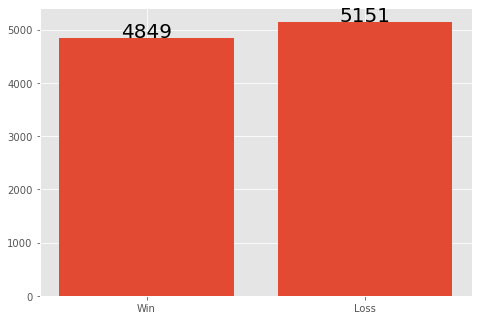

In [12]:
def next_bet(state: GameState) -> Optional[Bet]:
    return Bet(selection="red", size=state.units)

run(next_bet)

### Martingale strategy

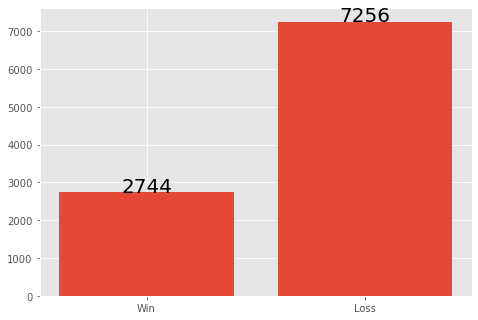

In [7]:
def next_bet(state: GameState) -> Optional[Bet]:
    if len(state.history) == 0:
        return Bet(selection="red", size=1)

    last_round = state.history[-1]
    if last_round.result == RoundResult.LOSS:
        return replace(last_round.bet, size=last_round.bet.size * 2)

    return Bet(selection="red", size=1)

run(next_bet)

### Gustek strategy

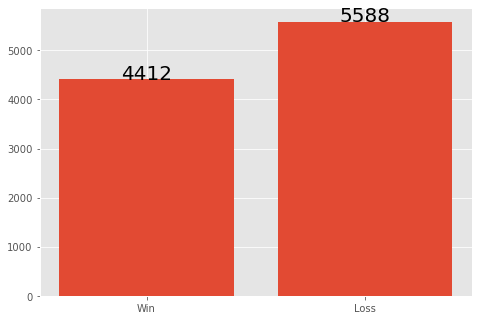

In [8]:
def next_bet(state: GameState) -> Optional[Bet]:
        if len(state.history) == 0:
            return Bet(selection=1, size=1)

        last_round = state.history[-1]
        if last_round.result == RoundResult.LOSS:
            if state.round % 18 == 0:
                return replace(last_round.bet, size=last_round.bet.size * 2)
            else:
                return last_round.bet

        return Bet(selection=1, size=1)

run(next_bet)

## Gambler's fallacy

### All-in strategy

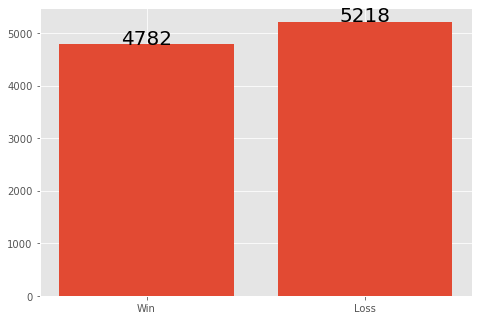

In [10]:
def next_bet(state: GameState) -> Optional[Bet]:
    if len(state.history) < 10:
        return None

    if all(map(lambda gs: not Roulette.is_red(gs.winning_number), state.history[-10:])):
        return Bet(selection="red", size=state.units)
    
    if all(map(lambda gs: not Roulette.is_black(gs.winning_number), state.history[-10:])):
        return Bet(selection="black", size=state.units)
    
    return None

run(next_bet)

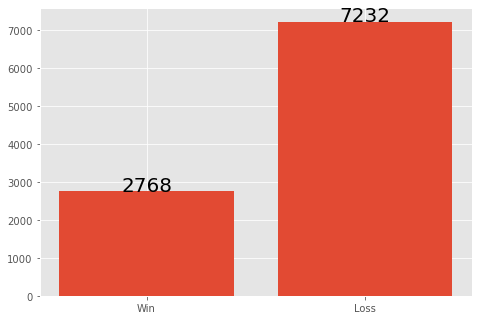

In [13]:
def next_bet(state: GameState) -> Optional[Bet]:
    if len(state.history) < 5:
        return None

    last_round = state.history[-1]
    if last_round.bet and last_round.result == RoundResult.LOSS:
        return replace(last_round.bet, size=last_round.bet.size * 2)

    if all(map(lambda gs: not Roulette.is_red(gs.winning_number), state.history[-5:])):
        return Bet(selection="red", size=1)
    
    if all(map(lambda gs: not Roulette.is_black(gs.winning_number), state.history[-5:])):
        return Bet(selection="black", size=1)
    
    return None

run(next_bet)

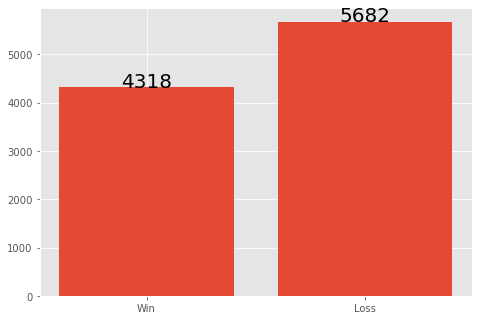

In [9]:
def get_cold_number(numbers: List[int]) -> int:
    counters = [0] * 37
    for i in numbers:
        counters[i] += 1
    return counters.index(min(counters))

def next_bet(state: GameState) -> Optional[Bet]:
        if len(state.history) < 200:
            return None

        last_round = state.history[-1]
        if last_round.bet and last_round.result == RoundResult.LOSS:
            if state.round % 18 == 0:
                return replace(last_round.bet, size=last_round.bet.size * 2)
            else:
                return last_round.bet

        past = map(lambda gs: gs.winning_number, state.history[-200:])
        return Bet(selection=get_cold_number(past), size=1)

run(next_bet)